# Simple Regression Problem with Pytorch

In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Generate synthetic energy dataset
# Features: temperature, humidity, wind speed, hour of day
# Target: energy consumption (kWh)
np.random.seed(42)
data_size = 1000

temperature = np.random.normal(15, 10, data_size)  # Average temperature in Celsius
humidity = np.random.uniform(20, 95, data_size)    # Humidity percentage
wind_speed = np.random.uniform(0, 15, data_size)   # Wind speed in m/s
hour_of_day = np.random.randint(0, 24, data_size)  # Hour of the day (0-23)

energy_consumption = (
    10 +
    0.5 * np.power(np.clip(temperature, 0, None), 1.5) -  # Clip negative temperatures to 0
    0.2 * np.power(np.clip(humidity, 0, None), 0.5) -     # Clip negative humidity to 0
    0.2 * wind_speed + 
    1.5 * np.sin(2 * np.pi * hour_of_day / 24) +
    np.random.normal(0, 1, data_size)  # Noise
)

# Create a DataFrame
data = pd.DataFrame({
    'temperature': temperature,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'hour_of_day': hour_of_day,
    'energy_consumption': energy_consumption
})

# Split into features and target
X = data[['temperature', 'humidity', 'wind_speed', 'hour_of_day']].values
y = data['energy_consumption'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the Feedforward Neural Network
class EnergyNet(nn.Module):
    def __init__(self):
        super(EnergyNet, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = EnergyNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
epochs = 200

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Print sample predictions
print("Sample Predictions:")
for i in range(5):
    print(f"Predicted: {predictions[i].item():.2f}, Actual: {y_test[i]:.2f}")


Epoch [10/200], Loss: 2203.1035
Epoch [20/200], Loss: 1109.8453
Epoch [30/200], Loss: 297.0649
Epoch [40/200], Loss: 96.0621
Epoch [50/200], Loss: 45.4528
Epoch [60/200], Loss: 21.1656
Epoch [70/200], Loss: 18.4134
Epoch [80/200], Loss: 16.6261
Epoch [90/200], Loss: 14.2380
Epoch [100/200], Loss: 12.6358
Epoch [110/200], Loss: 11.6251
Epoch [120/200], Loss: 10.7548
Epoch [130/200], Loss: 9.9484
Epoch [140/200], Loss: 9.2213
Epoch [150/200], Loss: 8.5710
Epoch [160/200], Loss: 7.9900
Epoch [170/200], Loss: 7.4700
Epoch [180/200], Loss: 7.0003
Epoch [190/200], Loss: 6.5733
Epoch [200/200], Loss: 6.1876
Test Loss: 7.9338
Sample Predictions:
Predicted: 60.50, Actual: 55.26
Predicted: 73.36, Actual: 70.76
Predicted: 9.01, Actual: 8.33
Predicted: 22.34, Actual: 19.65
Predicted: 10.59, Actual: 12.38


Epoch [10/100], Loss: 5.8378
Epoch [20/100], Loss: 5.5223
Epoch [30/100], Loss: 5.2365
Epoch [40/100], Loss: 4.9741
Epoch [50/100], Loss: 4.7318
Epoch [60/100], Loss: 4.5080
Epoch [70/100], Loss: 4.3036
Epoch [80/100], Loss: 4.1170
Epoch [90/100], Loss: 3.9464
Epoch [100/100], Loss: 3.7886
Test Loss: 5.8541
R2 Score: 0.9925


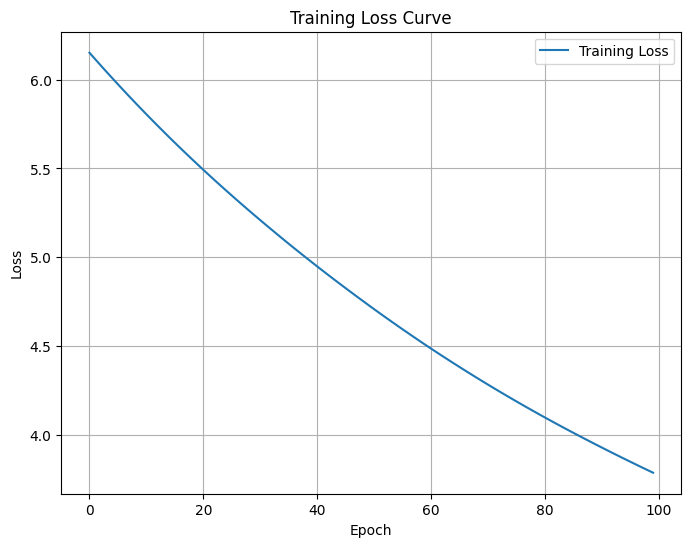

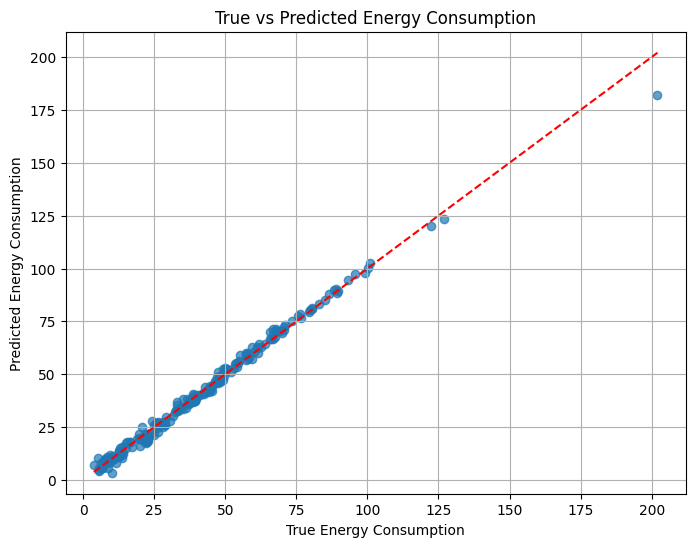

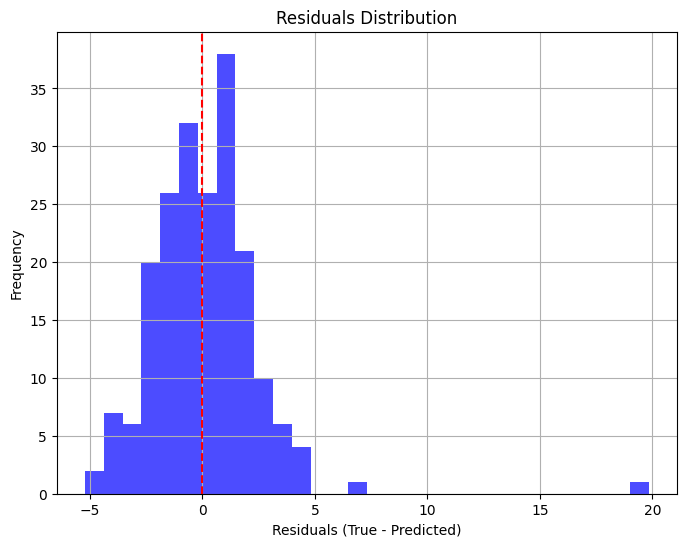

Analytics Summary:
Mean Residual: 0.0878
Standard Deviation of Residuals: 2.4179


In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Training the model
epochs = 100
loss_history = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Convert predictions to NumPy
y_pred = predictions.numpy().flatten()
y_test_np = y_test_tensor.numpy().flatten()

# Compute R2 score
r2 = r2_score(y_test_np, y_pred)
print(f'R2 Score: {r2:.4f}')

# Plot 1: Training Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

# Plot 2: True vs Predicted Energy Consumption
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred, alpha=0.7)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--')
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("True vs Predicted Energy Consumption")
plt.grid()
plt.show()

# Plot 3: Residuals
residuals = y_test_np - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (True - Predicted)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.grid()
plt.show()

# Analytics Summary
print("Analytics Summary:")
print(f"Mean Residual: {np.mean(residuals):.4f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.4f}")


# Portfolio Optimization

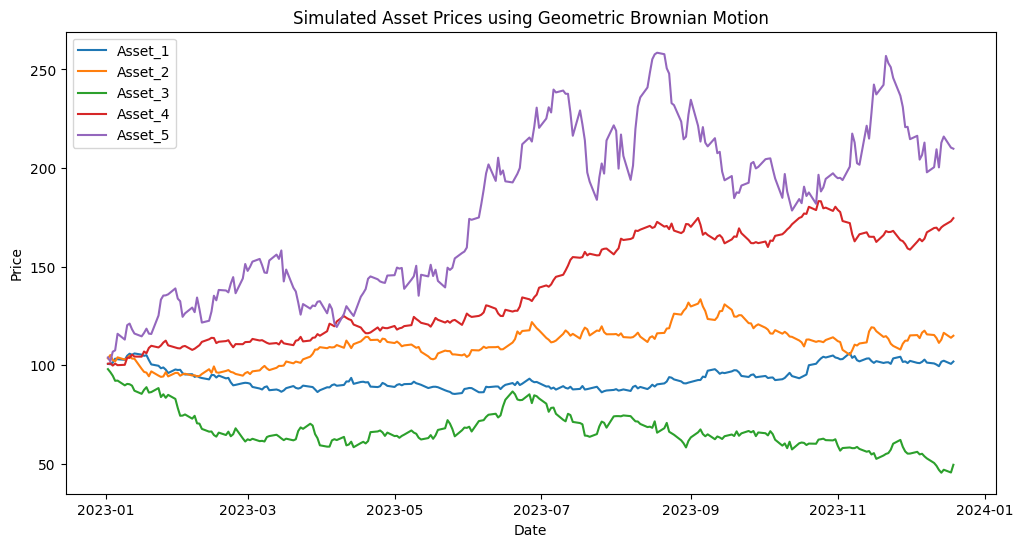

,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5
2023-01-02,100.627763,103.398557,97.971525,100.686017,103.909179
2023-01-03,100.464633,105.109765,96.443310,100.958662,101.836760
2023-01-04,101.299896,102.640413,94.624671,99.779031,106.795283
2023-01-05,103.274788,101.876384,92.049511,100.766511,107.505599
2023-01-06,102.982878,103.945478,92.155411,99.980094,115.905523


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to simulate Geometric Brownian Motion
def geometric_brownian_motion(S0, mu, sigma, T, dt):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.normal(0, np.sqrt(dt), size=N).cumsum()
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    return S0 * np.exp(X)

# Parameters for the 5 GBM assets
np.random.seed(42)
T = 1  # 1 year
dt = 1/252  # daily steps
assets = []
params = [
    (100, 0.05, 0.2),  # (S0, mu, sigma)
    (100, 0.07, 0.25),
    (100, 0.03, 0.5),
    (100, 0.06, 0.22),
    (100, 0.02, 0.58),
]

# Generate GBM data
for param in params:
    assets.append(geometric_brownian_motion(*param, T, dt))

# Combine into a DataFrame
dates = pd.date_range(start="2023-01-01", periods=int(T/dt), freq="B")
df_assets = pd.DataFrame(np.column_stack(assets), index=dates, columns=[f"Asset_{i+1}" for i in range(5)])

# Plot the simulated prices
plt.figure(figsize=(12, 6))
for column in df_assets.columns:
    plt.plot(df_assets.index, df_assets[column], label=column)
plt.title("Simulated Asset Prices using Geometric Brownian Motion")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

df_assets.head()


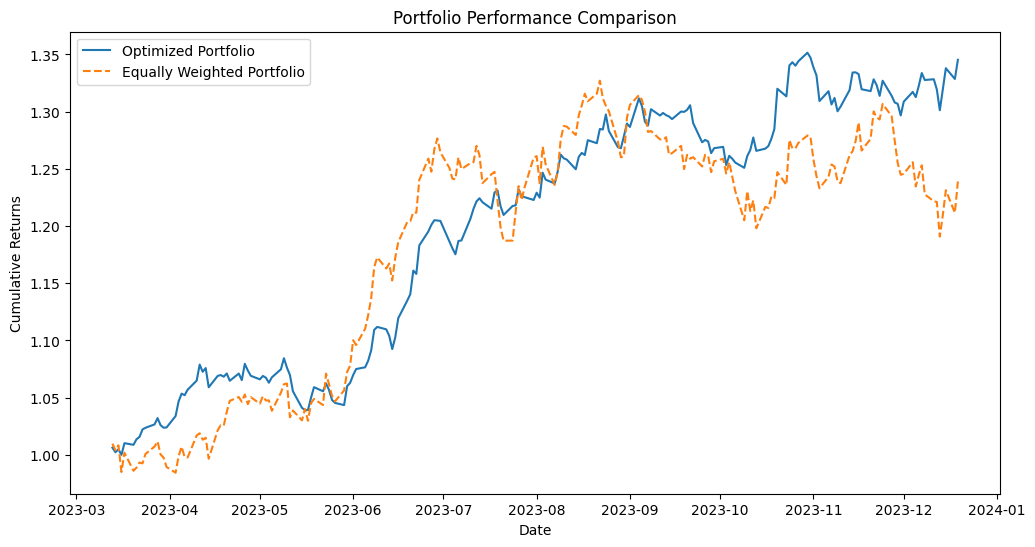

In [70]:
from scipy.optimize import minimize

# Portfolio optimization function
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def optimize_weights(window_data):
    returns = window_data.pct_change().dropna()
    cov_matrix = returns.cov()
    
    num_assets = len(window_data.columns)
    initial_weights = np.ones(num_assets) / num_assets
    bounds = tuple((0, 1) for _ in range(num_assets))
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    
    result = minimize(portfolio_volatility, initial_weights, args=(cov_matrix,), 
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Rolling window optimization
rolling_window = 50  # 60 trading days (~3 months)
optimal_weights = []

for i in range(len(df_assets) - rolling_window):
    window_data = df_assets.iloc[i:i+rolling_window]
    weights = optimize_weights(window_data)
    optimal_weights.append(weights)

# Optimal weights DataFrame
weights_df = pd.DataFrame(optimal_weights, columns=df_assets.columns, 
                          index=df_assets.index[rolling_window:])

# Evaluate portfolio performance
optimized_portfolio_returns = []
equal_weight_portfolio_returns = []

equal_weights = np.ones(len(df_assets.columns)) / len(df_assets.columns)

for i in range(len(weights_df)):
    next_return = df_assets.pct_change().iloc[rolling_window + i]
    optimized_portfolio_returns.append(np.dot(weights_df.iloc[i], next_return))
    equal_weight_portfolio_returns.append(np.dot(equal_weights, next_return))

# Convert returns to cumulative performance
optimized_cum_perf = (1 + np.array(optimized_portfolio_returns)).cumprod()
equal_weight_cum_perf = (1 + np.array(equal_weight_portfolio_returns)).cumprod()

# Performance comparison plot
plt.figure(figsize=(12, 6))
plt.plot(df_assets.index[rolling_window:], optimized_cum_perf, label='Optimized Portfolio')
plt.plot(df_assets.index[rolling_window:], equal_weight_cum_perf, label='Equally Weighted Portfolio', linestyle='--')
plt.title("Portfolio Performance Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


## with real data

In [71]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize



In [72]:
# Define the list of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download historical data
data = yf.download(tickers, start='2019-01-01', end='2023-11-01')['Adj Close']


[*********************100%%**********************]  5 of 5 completed


In [73]:
# Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()


In [74]:
# Function to calculate portfolio volatility
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Function to optimize portfolio weights
def optimize_weights(cov_matrix):
    num_assets = len(cov_matrix)
    initial_weights = np.ones(num_assets) / num_assets
    bounds = tuple((0, 1) for _ in range(num_assets))
    constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
    
    result = minimize(portfolio_volatility, initial_weights, args=(cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x


In [75]:
# Define rolling window size (e.g., 60 trading days)
rolling_window = 20

# Initialize a DataFrame to store optimal weights
weights_df = pd.DataFrame(index=log_returns.index[rolling_window:], columns=tickers)

# Calculate optimal weights for each rolling window
for i in range(rolling_window, len(log_returns)):
    window_data = log_returns.iloc[i-rolling_window:i]
    cov_matrix = window_data.cov()
    optimal_weights = optimize_weights(cov_matrix)
    weights_df.iloc[i-rolling_window] = optimal_weights


In [76]:
# Initialize lists to store portfolio returns
optimized_portfolio_returns = []
equal_weight_portfolio_returns = []

# Define equal weights
equal_weights = np.ones(len(tickers)) / len(tickers)

# Calculate portfolio returns
for i in range(len(weights_df)):
    next_return = log_returns.iloc[rolling_window + i]
    optimized_return = np.dot(weights_df.iloc[i], next_return)
    equal_weight_return = np.dot(equal_weights, next_return)
    optimized_portfolio_returns.append(optimized_return)
    equal_weight_portfolio_returns.append(equal_weight_return)

# Convert returns to cumulative performance
optimized_cum_perf = (1 + np.array(optimized_portfolio_returns)).cumprod()
equal_weight_cum_perf = (1 + np.array(equal_weight_portfolio_returns)).cumprod()


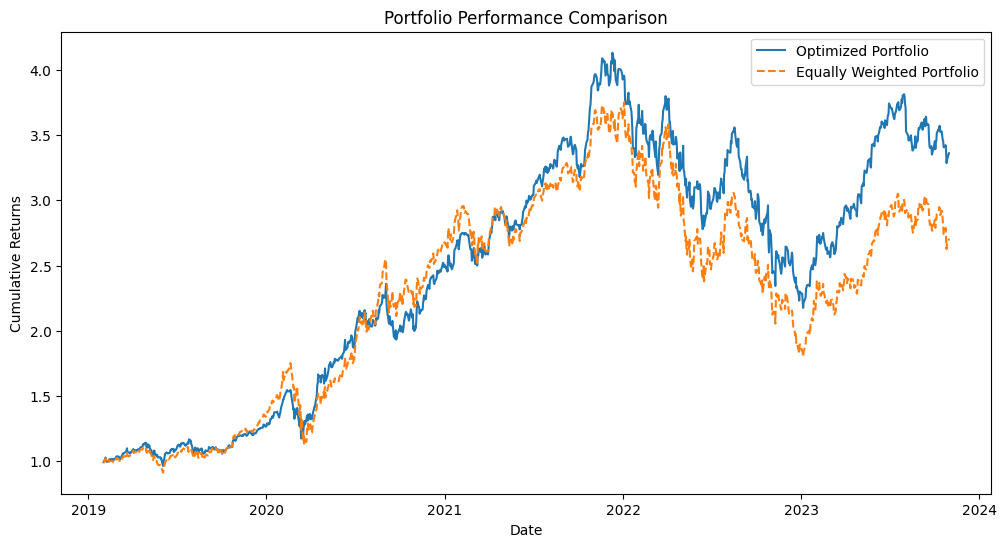

In [77]:
# Plot the performance comparison
plt.figure(figsize=(12, 6))
plt.plot(weights_df.index, optimized_cum_perf, label='Optimized Portfolio')
plt.plot(weights_df.index, equal_weight_cum_perf, label='Equally Weighted Portfolio', linestyle='--')
plt.title('Portfolio Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
